# Summary

In this notebook, we will explore various machine learning algorithms with the input variables created in the second notebook, including Logistic Regression, Deep Learning, RNN and LSTM. For the input variables, we tried different combinations of vectorizing methods and feature encoding methods. 

PS: We are not able to have the outputs for all the models because this notebook takes long to run entirely. The teammates ran models separately on their own computer. In this submission, we will include the model performance if we cannot obtain the running output in this notebook. 

# Libraries

In [1]:
import pandas as pd
import pickle
import nltk
from nltk.stem.porter import PorterStemmer
import pandas as pd
import sys
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import string
from nltk.corpus import stopwords
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
import seaborn as sns
from gensim.parsing.preprocessing import remove_stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

/Users/xinxuegu/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xinxuegu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xinxuegu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
from tqdm import tqdm

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [5]:
from typing import List
from keras.preprocessing.text import text_to_word_sequence

In [6]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
import warnings
warnings.filterwarnings("ignore")


In [31]:
##import Keras Toolkit
from random import randint
from numpy import array, argmax, asarray, zeros
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding

# Load the Data

In the '2_Prepare_Training_Data_behold_project.ipynb' notebook, we have created many varibles using Countvectorization, TFIDFVectorizer, Integer Encoding on our lemmatized description. Besides, we encoded the manually created features using one-hot encoding. 

We also conducted PCA dimensionality reduction on them. The following are our outputs:

1. CountVectorized: X_cv.pkl, princ_comps_cv.pkl
2. TfidfVectorized: X_tfidf.pkl,princ_comps_tfidf.pkl
3. Encoded Feature: cat_feat_array.pkl,features_princ_comps.pkl
4. Integer Encoding and Padding: padded_docs.pkl 



To explore what kind of input variables can bring better performance to our machine learning models, we concatenate the data above to create different combinations of training data.
We saved those variables as Pickle files for quicker loading speed. 

1.the countvectorized lemma description + encoded feature array with PCA
    
    cv_featPca_1.pkl

2.the countvectorized lemma description with PCA + encoded feature vector without PCA

    cvPca_feat_2.pkl: 
3.the the countvectorized lemma description with PCA + encoded feature array with PCA
    
    cvPca_featPca_3.pkl
    
4.the tfidf vectorized lemma description with PCA + encoded feature array with PCA
    
    tfidfPca_featPca_4.pkl


5.For the deep learning models we prepared a tokenized lemmatized description using keras.preprocessing.text.Tokenizer, and saved in the following file:
    
    tokenizer_word_index.pkl

6.We also saved the pretrained GloVe Embeddings as pkl file so that we can load it faster. 
    
    embedding_matrix.pkl


The cells below are to load these variables into the environment. 

PS: If you don't have the pkl files below in your local environment, just run the second notebook thoroughly from the beginning, then you will have them all. It only takes less than 10 mins to run. 

In [8]:
# final cleaned data 
with open('final_cleaned_data.pkl', 'rb') as f:
    behold_prod = pickle.load(f) 

In [9]:
# # load variables with this chunk of code

import pickle

# Encode Features
# cat_feat_array.pkl is the array of encoded features
with open('cat_feat_array.pkl', 'rb') as f:
        cat_feat_array = pickle.load(f)

# features_princ_comps.pkl is pca on the encoded feature array (cat_feat_array.pkl)
with open('features_princ_comps.pkl', 'rb') as f:
     features_princ_comps = pickle.load(f)

#=====================================================================   
#Countvectorizer
# X_cv.pkl is the Countvertorized lemmatized descriptions
with open('X_cv.pkl', 'rb') as f:
    X_cv = pickle.load(f)
# princ_comps_cv.pkl is the pca on Countvertorized lemmatized descriptions(X_cv.pkl)
with open('princ_comps_cv.pkl', 'rb') as f:
    princ_comps_cv = pickle.load(f)

#=====================================================================   
#TFIDF
 # X_tfidf.pkl is the tfidf vectorized lemmatized description
with open('X_tfidf.pkl', 'rb') as f:
    X_tfidf = pickle.load(f)
 # princ_comps_tfidf.pkl is the tfidf vectorized lemmatized description(X_tfidf.pkl) with PCA
with open('princ_comps_tfidf.pkl', 'rb') as f:
    princ_comps_tfidf = pickle.load(f)

#=====================================================================  

## combinations of the above data, to make different set of training data
## the number in the file name indicates their order to be used in the model exploration
## they were named X_all before

# cv_featPca_1.pkl is the countvectorized lemma description + encoded feature array with PCA
with open('cv_featPca_1.pkl', 'rb') as f:
    cv_featPca_1 = pickle.load(f)
# cvPca_feat_2.pkl is the countvectorized lemma description with PCA + encoded feature vector without PCA
with open('cvPca_feat_2.pkl', 'rb') as f:
    cvPca_feat_2 = pickle.load(f)    
# cvPca_featPca_3.pkl is the the countvectorized lemma description with PCA + encoded feature array with PCA
with open('cvPca_featPca_3.pkl', 'rb') as f:
    cvPca_featPca_3 = pickle.load(f)  
# tfidfPca_featPca_4.pkl is the tfidf vectorized lemma description with PCA + encoded feature array with PCA
with open('tfidfPca_featPca_4.pkl', 'rb') as f:
     tfidfPca_featPca_4 = pickle.load(f)  

#===================================================================== 
#tokenizer_word_index.pkl is the tokenized lemma description 
with open('tokenizer_word_index.pkl', 'rb') as f:
    tokenizer_word_index =  pickle.load(f)   
# padded_docs.pkl is the lemmatized_description after integer encoding and padding 
with open('padded_docs.pkl', 'rb') as f:
    padded_docs = pickle.load(f) 
    



In [10]:

# embedding_matrix.pkl is the loaded pretrained embeddings from GloVe
with open('embedding_matrix.pkl', 'rb') as f:
    embedding_matrix = pickle.load(f) 

In [11]:
## define dependent variable
labels = behold_prod['label']

corpus = behold_prod['lemmatized_description']

The number of labels we need to classify is 31.

In [12]:
len(behold_prod.label.value_counts())

31

# Label Encoding the Target

The current brand labels are strings. We need to use LabelEncoder to transform them into numeric. 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(behold_prod['label'].astype(str))
y=le.transform(behold_prod['label'].astype(str))

# Models explored

## Logistic Regression

We tried logistic regression algorithm on the vectorized lemmtized description with different vectorizing method (countvectorize, tfidf), and run them with or without encoded features. 

The best performance is from LR on CountVectorisation(no PCA) + Encoded Features (PCA), which has around 90% accuracy. 


In [25]:
# Fix number of iterations
iteration_count=1

### LR on CountVectorisation(without PCA)

First we run a LR model on the count vectorized lemma description, without PCA, without adding encoded features. The accuracy is around 88%. 

In [26]:
lr=LogisticRegression(max_iter=500)

In [27]:
for n in range(0,iteration_count):
    X_train,X_test,y_train,y_test=train_test_split(X_cv,y, test_size=0.2, random_state=n,stratify=y)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    # calculate accuracy
    print(np.mean(y_pred == y_test))

0.8828131366636786


### LR on CountVectorisation(with PCA)

Then we run the same model with principle components. The accuracy drops a little. 

In [28]:
for n in range(0,iteration_count):
    X_train,X_test,y_train,y_test=train_test_split(princ_comps_cv ,y, test_size=0.2, random_state=n,stratify=y)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    # calculate accuracy
    print(np.mean(y_pred == y_test))

0.8642327438676555


### LR on CountVectorisation(non PCA) + Encoded Features (PCA)

This time we added encoded features' PCA to the input variables. The accuracy improved from 88% to nearly 90%. This means our encoded features are useful in terms of predicting brands. 

In [29]:
#X_all=np.concatenate([X_cv.toarray(),features_princ_comps],axis=1)
X_all = cv_featPca_1

In [30]:
X_all.shape

(61355, 2743)

In [31]:
for n in range(0,1):
    X_train,X_test,y_train,y_test=train_test_split(X_all ,y, test_size=0.2, random_state=n,stratify=y)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    # calculate accuracy
    print(np.mean(y_pred == y_test))

0.9054681770026892


### LR on CountVectorisation(PCA) + Encoded Features (non PCA)

Another LR model runs on conunvectors' pca and encoded features without pca. The performance drops a little but is still better than the model without encoded features. 

In [32]:
#X_all=np.concatenate([princ_comps_cv,cat_feat_array],axis=1)
X_all = cvPca_feat_2

In [33]:
X_all.shape

(61355, 550)

In [34]:
for n in range(0,1):
    X_train,X_test,y_train,y_test=train_test_split(X_all ,y, test_size=0.2, random_state=n,stratify=y)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    # calculate accuracy
    print(np.mean(y_pred == y_test))

0.8871322630592454


### LR on CountVectorisation(PCA) + Encoded Features (PCA)

This model runs on conunvectors' pca and encoded features pca. This performed slightly worse than the countvectorisation(no pca) + encoded features (PCA). But considering the input variables for this has lower dimensions, we will use this one as our baseline for reference. 

In [31]:
#X_all=np.concatenate([princ_comps_cv,features_princ_comps],axis=1)
X_all = cvPca_featPca_3

In [32]:
X_all.shape

(61355, 520)

In [33]:
for n in range(0,1):
    X_train,X_test,y_train,y_test=train_test_split(X_all ,y, test_size=0.2, random_state=n,stratify=y)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    # calculate accuracy
    print(np.mean(y_pred == y_test))

0.8942221497840437


### LR on TF-IDF(with PCA)

Instead of using the Countvectorizer, we use TFIDF to vectorize the lemma descriptions. As you can see the performance is not as good as the ones using Countvectorizer. 

In [93]:
for n in range(0,2):
    X_train,X_test,y_train,y_test=train_test_split(princ_comps_tfidf ,y, test_size=0.2, random_state=n,stratify=y)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    # calculate accuracy
    print(np.mean(y_pred == y_test))

0.7543802461087116
0.7544617390595714


### LR on TF-IDF+Encoded Features (both PCA)

This model uses TFIDF vectorized lemma descriptions with pca plus the encoded features with pca. 

In [30]:
#X_all=np.concatenate([princ_comps_tfidf,features_princ_comps],axis=1)
X_all = tfidfPca_featPca_4

In [95]:
for n in range(0,2):
    X_train,X_test,y_train,y_test=train_test_split(X_all ,y, test_size=0.2, random_state=n,stratify=y)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    # calculate accuracy
    print(np.mean(y_pred == y_test))

0.7956971721946051
0.8015646646565072


## Deep Learning

We used keras library to run the deep learning model. We tried running with or without pretrained embeddings (GloVe), with or without encoded features.

For all the deep learning models, we don't have the running outputs in this notebook. Because they were run on another computer. But the model performances were documented below. 

In [15]:
## label the dependent variable

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels=behold_prod['label']
labels = to_categorical(encoder.fit_transform(labels))

The input varibles are from the padded_docs created in the second notebook.

In [16]:
## split train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2)


### Without Pretrained Embeddings + Without encoded Features

First we build a model without pretrained embbeddings (weights), just let the algorithm to decide. This is the baseline for deep learning models. 

The accuacy is around 82%.

We set the max_length to be 300. The embedding shape will be (300,300)

In [25]:
max_length=300
vocab_size = int(len(tokenizer_word_index) * 1.3)
print(f"Vocab size is {vocab_size} unique tokens.")

Vocab size is 45548 unique tokens.


In [18]:
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=max_length))
model.add(Flatten()) 
model.add(Dense(31, activation='softmax')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          13664400  
_________________________________________________________________
flatten (Flatten)            (None, 90000)             0         
_________________________________________________________________
dense (Dense)                (None, 31)                2790031   
Total params: 16,454,431
Trainable params: 16,454,431
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit the model
model.fit(X_train, y_train, epochs=30, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

 ### With Pretrained Embeddings + Without encoded Features

The second deep learning model we tried uses the GloVe embeddings only, without adding and encoded features. 

The model accuracy is around 84%. 

In [ ]:
# define model
model = Sequential()
e = Embedding(vocab_size, 100,weights=[embedding_matrix], input_length=300, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(31, activation='sigmoid'))
print(model.summary())

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# fit the model
model.fit(X_train, y_train, epochs=30, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

### With Pretrained Embeddings + Encoded Features as an additional layer

We also tried adding encoded features as an additional layer on top of the pretrained embeddings. 

But the performance is as good as the other ones. It only has less than 80% accuracy. 

In [ ]:
vocab_size = int(len(tokenizer_word_index) * 1.3)
print(f"Vocab size is {vocab_size} unique tokens.")

In [ ]:
length_cat_array=cat_feat_array.shape[1]

In [ ]:
length_cat_array

In [ ]:
import keras
model=Sequential()
# Use Input layers, specify input shape (dimensions except first)
inp_text_data = keras.layers.Input(shape=(300,))
inp_cat_data = keras.layers.Input(shape=(length_cat_array))
# Bind nulti_hot to embedding layer
emb = keras.layers.Embedding(vocab_size,input_length=300,weights=[embedding_matrix], output_dim=100,trainable=False)(inp_text_data)  
# Also you need flatten embedded output of shape (?,3,2) to (?, 6) -
# otherwise it's not possible to concatenate it with inp_num_data
flatten = keras.layers.Flatten()(emb)
# Concatenate two layers
conc = keras.layers.Concatenate()([flatten, inp_cat_data])
# dense1 = keras.layers.Dense(31)(conc)
# Creating output layer
out = keras.layers.Dense(31, activation='softmax')(conc)
model = keras.Model(inputs=[inp_text_data, inp_cat_data], outputs=out)


## RNN

RNN is good at processing sequence data for prediction. Text can also be sequence data. We fit the RNN model with pre-trained embeddings on the lemmatized description corpus. 


### Glove Embedding + RNN (no pca)

In this model, we use the glove embeddings. The input variables are just the lemmatized desciption in the behold_prod dataframe. The accuracy is around 80%. 

In [ ]:
# !python -m spacy download en_core_web_md

In [13]:
corpus = behold_prod['lemmatized_description']
labels = behold_prod['label']

In [14]:
# ## tokenize text

# from keras.preprocessing.text import Tokenizer
# # so this means that all tokens that are not found in the vocabulary are going to be marked as UNKNOWN_TOKEN
# tokenizer = Tokenizer(num_words=10000, oov_token="UNKNOWN_TOKEN")
# tokenizer.fit_on_texts(corpus)

Use the tokenized word from the second notebook: tokenizer_word_index

In [ ]:
vocab_size = int(len(tokenizer_word_index) * 1.3)
print(f"Vocab size is {vocab_size} unique tokens.")

Let's create a new padded docs here to provide some flexibility for model adjusting. 

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def integer_encode_documents(docs, tokenizer):
    return tokenizer.texts_to_sequences(docs)

# integer encode the documents
encoded_docs = integer_encode_documents(corpus, tokenizer)
# see some lengths of the documents
list(map(len, encoded_docs))[:5]

[66, 39, 8, 7, 1]

In [16]:
max(list(map(len, encoded_docs)))

513

Padding the encoded docs with length equals to the maximum length of encoded docs.

In [17]:
# set MAX_SEQUENCE_LENGTH 
MAX_SEQUENCE_LENGTH = 513

In [18]:
padded_docs = pad_sequences(encoded_docs, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [19]:
## encode the label
encoder = LabelEncoder()
labels = to_categorical(encoder.fit_transform(labels))

In [20]:
## split train and test
## independent variables using the new padded docs we just created 
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.3)

In [22]:
# define the model 
import keras
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Flatten, Masking


In [27]:
## define the rnn model 
def make_classification_rnn_model(plot=False):
    model =  keras.models.Sequential()
    model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(SimpleRNN(units=128, input_shape=(1, MAX_SEQUENCE_LENGTH)))
    model.add(Dense(64))
    model.add(Dense(31, activation='softmax')) ## if multiple class, better use softmax rather than sigmoid
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [28]:
## compile the model
model = make_classification_rnn_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 513, 100)          4554800   
_________________________________________________________________
masking (Masking)            (None, 513, 100)          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               29312     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 31)                2015      
Total params: 4,594,383
Trainable params: 39,583
Non-trainable params: 4,554,800
_________________________________________________________________


In [29]:
y_train.shape

(42948, 31)

In [30]:
# fit the model
history = model.fit(X_train, y_train, validation_split = 0.1, 
                    epochs=20, batch_size=64, verbose=1)

Epoch 1/20
604/604 [==============================] - 114s 188ms/step - loss: 1.8045 - accuracy: 0.5421 - val_loss: 1.0554 - val_accuracy: 0.7185
Epoch 2/20
604/604 [==============================] - 120s 198ms/step - loss: 0.9715 - accuracy: 0.7393 - val_loss: 0.8979 - val_accuracy: 0.7618
Epoch 3/20
604/604 [==============================] - 110s 182ms/step - loss: 0.8000 - accuracy: 0.7842 - val_loss: 0.8203 - val_accuracy: 0.7814
Epoch 4/20
604/604 [==============================] - 109s 180ms/step - loss: 0.7396 - accuracy: 0.8002 - val_loss: 0.8405 - val_accuracy: 0.7739
Epoch 5/20
604/604 [==============================] - 116s 191ms/step - loss: 0.6614 - accuracy: 0.8186 - val_loss: 0.7744 - val_accuracy: 0.7972
Epoch 6/20
604/604 [==============================] - 106s 176ms/step - loss: 0.6168 - accuracy: 0.8324 - val_loss: 0.7940 - val_accuracy: 0.7965
Epoch 7/20
604/604 [==============================] - 105s 174ms/step - loss: 0.5760 - accuracy: 0.8432 - val_loss: 0.7631 -

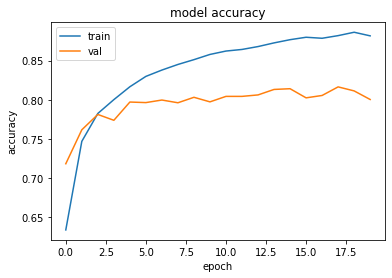

In [32]:
import keras
from matplotlib import pyplot as plt

def plot_fit_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
plot_fit_history(history)

In [33]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

576/576 [==============================] - 20s 34ms/step - loss: 0.8141 - accuracy: 0.8095
Accuracy: 80.952901


## LSTM

### Glove Embeddings + LSTM (no pca)

LSTM stands for long short term memory. They are extremely powerful time-series models. They can predict an arbitrary number of steps into the future. An LSTM module (or cell) has 5 essential components which allows it to model both long-term and short-term data. 

- Cell state (ct) - This represents the internal memory of the cell which stores both short term memory and long-term memories
- Hidden state (ht) - This is output state information calculated w.r.t. current input, previous hidden state and current cell input which you eventually use to predict the future stock market prices. Additionally, the hidden state can decide to only retrive the short or - long-term or both types of memory stored in the cell state to make the next prediction.
- Input gate (it) - Decides how much information from current input flows to the cell state
- Forget gate (ft) - Decides how much information from the current input and the previous cell state flows into the current cell state
- Output gate (ot) - Decides how much information from the current cell state flows into the hidden state, so that if needed LSTM can only pick the long-term memories or short-term memories and long-term memories

We tried to run LSTM with pretrained embeddings on lemmatized description corpus. The accuracy is around 89%. 

In [34]:
import keras
from keras.layers.recurrent import SimpleRNN, LSTM
from keras.layers import Flatten, Masking

In [37]:
def make_lstm_classification_model(plot=False):
    model =  keras.models.Sequential()
    model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Masking(mask_value=0.0)) # masking layer, masks any words that don't have an embedding as 0s.
    model.add(LSTM(units=128, input_shape=(1, MAX_SEQUENCE_LENGTH)))
    model.add(Dense(64))
    model.add(Dense(31, activation='softmax'))
    
    # Compile the model
    model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    if plot:
        plot_model(model, to_file='model.png', show_shapes=True)
    return model

When fitting the model, we set the epochs to 10 and batch_size to 64 save some running time. But ideally if we more computing power, we can make 20 or more epochs. This may lead to better accuracy. 

In [ ]:
## cimpile the model
model = make_lstm_classification_model()
# fit the model
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=10, batch_size=64,verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 513, 100)          4554800   
_________________________________________________________________
masking_1 (Masking)          (None, 513, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 31)                2015      
Total params: 4,682,319
Trainable params: 127,519
Non-trainable params: 4,554,800
_________________________________________________________________
Epoch 1/10
604/604 [==============================] - 274s 448ms/step - loss: 1.8088 - accuracy: 0.5343 

In [ ]:
plot_fit_history(history)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))